The critical radius is 0.104 m
The critical height is 0.191 m
The mass of the cilinder has to be bigger than 121 kg
We work with a cylinder of radius 0.105 m and a height of 0.192 m


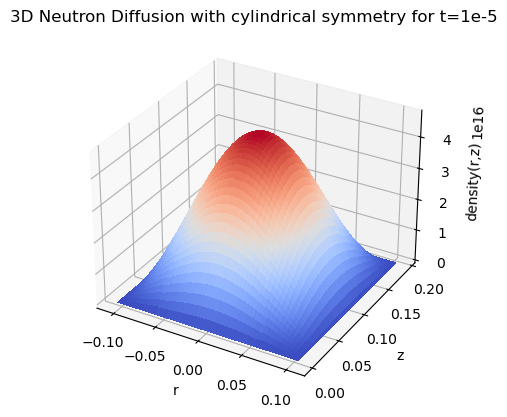

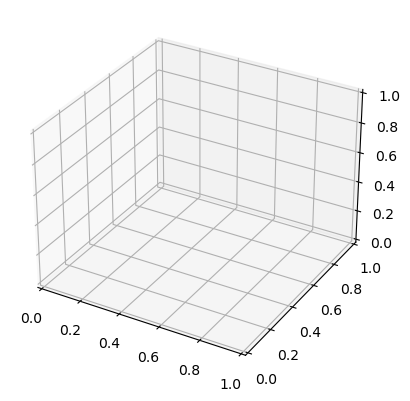

In [1]:
#3D Analysis w/ cylindrical coordinates and Dirichlet Boundary Condition

# We are studying the neutron diffusion in 3-dimensions and with cylindrical symmetry. 
# This does not represent a physical situation due to the Dirchlet Boundary Condition.  
# We find the critical dimension (cylinder's height and radius) of the fissile material, the critical mass and
# the evolution of the neutron density as a function of time. A first plot of the density is 
# produced for a fixed time and a fixed height of the cylinder and then a dynamical plot (.gif file) is produced 
# and saved to show the evolution in time of the neutron density as a function of the cylinder's height and radius
# 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
import scipy.integrate as spi
import scipy.special as sc
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.animation import PillowWriter

# Reading the parameters from an external file .txt
file1 = open('/Users/enrico.perboni14/Desktop/Tesi Magistrale/Uranium235.txt', "r")
read_content = file1.readlines()[0 : 4]
values = list(range(4))
for i in range(0,4):
    values[i] = read_content[i].split()
for i in range(0,4):
    exec("%s = %f" % (values[i][0],float(values[i][2])))  
file1.close()

#Implementing Bessel function zeros
alpha = sc.jn_zeros(0, 30) 

height_critical_cylinder = np.pi*np.sqrt(3*mu/eta)
r_critical_cylinder = alpha[0]*np.sqrt(3*mu/(2*eta)) 
height_cylinder = round(height_critical_cylinder, 3) + 0.001
r_cylinder = round(r_critical_cylinder, 3) + 0.001
critical_cylinder_mass = rho*np.pi*height_critical_cylinder*r_critical_cylinder**2
print('The critical radius is', round(r_critical_cylinder, 3), 'm')
print('The critical height is', round(height_critical_cylinder, 3), 'm')
print('The mass of the cilinder has to be bigger than', round(critical_cylinder_mass), 'kg')

print('We work with a cylinder of radius',r_cylinder, 'm and a height of', height_cylinder, 'm') 

# Setting the maximum value of the time
T_cyl = 1e-5

#Fourier coefficients for the general solution
initial_condition_cyl = lambda r, z : (1-r**2/r_cylinder**2)*np.sin(np.pi*z/height_cylinder)
integrand_Fourier_cylinder = lambda r, z : 4/(height_cylinder*r_cylinder**2*sc.j1(alpha[q])**2)*sc.j0(alpha[q]/r_cylinder*r)*r*initial_condition_cyl(r,z)*np.sin(np.pi*z/height_cylinder)

tupla_coefficient_cylinder = np.zeros(np.size(alpha), dtype = tuple)
for i in range (np.size(alpha)):
    q = i
    tupla_coefficient_cylinder[i] = spi.dblquad(integrand_Fourier_cylinder, 0, height_cylinder, 0, r_cylinder)
    
float_coefficients_cylinder = np.zeros(np.size(alpha), dtype = float) # extracting the values of the integrals from tuples

for i in range (np.size(alpha)):
    float_coefficients_cylinder[i] = tupla_coefficient_cylinder[i][0]    

def neutron_density_cylinder(t,r,z):
    neutron_density_cylinder = 0
    for j in range(np.size(alpha)):
        neutron_density_cylinder += float_coefficients_cylinder[j]*sc.j0(alpha[j]*r/r_cylinder)*np.sin(np.pi*z/height_cylinder)*np.exp((eta*r_cylinder**2*height_cylinder**2 - mu*(alpha[j]**2*height_cylinder**2 + np.pi**2*r_cylinder**2))/(r_cylinder**2*height_cylinder**2)*t)        
    return neutron_density_cylinder

neutron_diffusion_cylinder_plot = plt.figure()
ax = plt.axes(projection = '3d')
r = np.linspace(-r_cylinder, r_cylinder, 100)
z = np.linspace(0, height_cylinder, 100)
R, Z = np.meshgrid(r,z)
N = neutron_density_cylinder(T_cyl, R, Z)
surf_cil = ax.plot_surface(R,Z, N, cmap=cm.coolwarm,
               linewidth=0, antialiased=False)
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('density')
ax.set_title('3D Neutron Diffusion with cylindrical symmetry for t=1e-5')
plt.show()

# We are going now to create the dynamical plot for the cilindrical neutron diffusion, fixing a particular value of z, the height and studying the time behavior

# Fixing random state for reproducibility
np.random.seed(19680801)

metadata = dict(title='Movie', artist='enricoperboni4')
writer = PillowWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

with writer.saving(fig, "3D Cylindrical Neutron Diffusion.gif", 100):
    for tval in np.linspace(0,T_cyl, 150):
        zval = neutron_density_cylinder(tval, R, Z)
        ax.set_zlim(0, 3e16)
        ax.plot_surface(R, Z,zval,cmap=cm.coolwarm)
        ax.set_xlabel('r')
        ax.set_ylabel('z')
        ax.set_zlabel('density(t,r,z)')
        ax.set_title('3D Neutron Diffusion with Cylindrical Symmetry')

        writer.grab_frame()
        plt.cla()

